In [7]:
# def load_data(file_name):
#     with open(file_name, 'r') as file:
#         num_variables = int(file.readline().strip())
#         function_expression = file.readline().strip()
#         num_intervals = int(file.readline().strip())
#         intervals = [list(map(float, line.split())) for line in file.readlines()]

#     return num_variables, function_expression, num_intervals, intervals
# # żeby czytało postać funkcji z pliku a nie z casów jak def funkcje poniżej

In [8]:
import matplotlib.pyplot as plt
import os
import math
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import re

def funkcje(numer):
    funkcje_mapping = {
        1: "5 * X1**3 - 2 * X1**2 + 3 * X1 - 17",
        2: "math.sin(X1) + math.cos(X1)",
        3: "2 * math.log(X1 + 1)",
        4: "X1 + 2 * X2",
        5: "math.sin(X1 / 2) + 2 * math.cos(X1)",
        6: "X1**2 + 3 * X1 * X2 - 7 * X2 + 1",
    }
    return funkcje_mapping.get(numer, "")

def wyznaczanie_numeru_funkcji(nazwa_pliku):
    match = re.search(r"fun(\d+)", nazwa_pliku)
    return int(match.group(1)) if match else 0

def wyznaczanie_numeru_dziedziny(nazwa_pliku):
    match = re.search(r"dzi(\d+)", nazwa_pliku)
    return int(match.group(1)) if match else 0

def wyznaczanie_przedzialow(nazwa_pliku):
    tabela = nazwa_pliku[:-4].split()
    if tabela[-2] == "pi":
        return -3.14, 3.14
    return tabela[-3], tabela[-2]

def wyznaczanie_kroku_funkcji(nazwa_pliku):
    match = re.search(r"(\d+(\.\d+)?)\.dat$", nazwa_pliku)
    return float(match.group(1)) if match else 0.1

def plotowanie_jednoargumentowe(p, k, funkcja, nr_funkcji, krok):
    x_axis, y_axis, y_original = [], [], []
    # krok = wyznaczanie_kroku_funkcji()
    i, koniec = round(float(p),2), round(float(k),2)
    funkcja_original = funkcje(nr_funkcji)

    sin = math.sin
    cos = math.cos
    math.sin = math.sin
    math.cos = math.cos
    print(funkcja_original)
    print(funkcja)
    while i < koniec:
        X1 = i 
        # print(X1)
        if i<0.0001 and i>-0.0001: 
            print("Przypadek: ", i, X1, krok)
            X1 = i+krok
            # print("Przypadek: ", i, X1)
        # y_axis.append(eval(funkcja))
        # y_original.append(eval(funkcja_original))
        try:
            y_axis.append(eval(funkcja))
        except ZeroDivisionError:
            y_axis.append(float(0))
        try:
            y_original.append(eval(funkcja_original))
        except ZeroDivisionError:
            y_original.append(float(0))
        x_axis.append(i)
        i += krok

    return x_axis, y_axis, y_original

def wypisz_funkcje_jednoargumentowa(nazwa_pliku, sciezka_docelowa, nr_funkcji):
    with open(nazwa_pliku, 'r') as plik:
        zawartosc = plik.read()

    if len(zawartosc) > 0:
        zawartosc = zawartosc.replace(")(", ") * (")
        poczatek, koniec = wyznaczanie_przedzialow(nazwa_pliku)
        krok = wyznaczanie_kroku_funkcji(nazwa_pliku)
        print("Krok: ", krok)
        print("Początek: ", poczatek, " , Koniec: ", koniec)
        x, y_gp, y_original = plotowanie_jednoargumentowe(poczatek, koniec, zawartosc, nr_funkcji, krok)

        plt.grid(True)
        plt.scatter(x, y_gp, color='green', label='TinyGP', s=10)
        plt.scatter(x, y_original, color='orange', label='Proper', s=10)
        plt.xlabel('Oś X')
        plt.ylabel('Oś Y')
        plt.legend()
        nazwa_obrazka = f"img{nazwa_pliku[nazwa_pliku.rfind(os.path.sep)+5:-4]}.png"
        plt.savefig(os.path.join(sciezka_docelowa, nazwa_obrazka))
        plt.show()

        return os.path.join(sciezka_docelowa, nazwa_obrazka)

def plotowanie_dwuargumentowe(p, k, funkcja, nr_funkcji, nr_dziedziny, krok):
    x1_axis, x2_axis, y_axis, y_original = [], [], [], []
    # krok = wyznaczanie_kroku_funkcji(nr_funkcji)
    funkcja_original = funkcje(nr_funkcji)
    i, koniec = (p), (k)
    
    sin = math.sin
    cos = math.cos
    math.sin = math.sin
    math.cos = math.cos
    while i < koniec:
        j = (p)
        X1 = i 
        if i == 0:
            X1+=krok
        while j < koniec:
            X2 = j 
            if j == 0:
                X2+krok
            try:
                y_axis.append(eval(funkcja))
                y_original.append(eval(funkcja_original))
            except ZeroDivisionError:
                y_axis.append(float('nan'))
                y_original.append(float('nan'))
            x1_axis.append(i)
            x2_axis.append(j)
            j += krok
        i += krok
    
    return x1_axis, x2_axis, y_axis, y_original

def wypisz_funkcje_dwuargumentowa(nazwa_pliku, sciezka_docelowa, nr_funkcji):
    with open(nazwa_pliku, 'r') as plik:
        zawartosc = plik.read()
    if len(zawartosc) > 0:
        zawartosc = zawartosc.replace(")(", ") * (")
        poczatek, koniec = wyznaczanie_przedzialow(nazwa_pliku)
        nr_dziedziny = int(wyznaczanie_numeru_dziedziny(nazwa_pliku))
        krok = wyznaczanie_kroku_funkcji(nazwa_pliku)
        print("Krok: ", krok)
        x1, x2, y, y_original = plotowanie_dwuargumentowe(poczatek, koniec, zawartosc, nr_funkcji, nr_dziedziny, krok)
        size = 5
        fig, ax = plt.subplots(1, 2, figsize=(10, 5), subplot_kw={'projection': '3d'})

        ax[0].scatter(x1, x2, y, color='green', label='TinyGP', s=size)
        ax[0].scatter(x1, x2, y_original, color='orange', label='Proper', s=size)

        ax[0].set_xlabel('X1')
        ax[0].set_ylabel('X2')
        ax[0].set_zlabel('Y')
        ax[0].legend()

        ax[1].scatter(x1, x2, y, color='green', label='TinyGP', s=size)
        ax[1].scatter(x1, x2, y_original, color='orange', label='Proper', s=size)
        ax[1].view_init(elev=30, azim=45)
        ax[1].text2D(0.05, 0.95, "Rzut z boku", transform=ax[1].transAxes)

        ax[1].set_xlabel('X1')
        ax[1].set_ylabel('X2')
        ax[1].set_zlabel('Y')
        ax[1].legend()

        nazwa_obrazka = f"img{nazwa_pliku[nazwa_pliku.rfind(os.path.sep)+5:-4]}.png"
        plt.savefig(os.path.join(sciezka_docelowa, nazwa_obrazka))
        plt.show()

        return os.path.join(sciezka_docelowa, nazwa_obrazka)

def znajdz_pliki_done(folder, pattern):
    pliki_done = []
    # folder_done = os.path.join(folder)
    folder_done = os.path.join(folder, "files", "3 - tinyGP_calculated")
    folder_img = os.path.join(folder, "files", "4 - tinyGP_plotted")

    for plik in os.listdir(folder_done):
        if plik.startswith(pattern) and plik.endswith(".dat"):
            pelna_sciezka = os.path.join(folder_done, plik)
            nr_funkcji = wyznaczanie_numeru_funkcji(plik)
            print("Funkcja: ", nr_funkcji)
            if nr_funkcji < 4:
                nazwa = wypisz_funkcje_jednoargumentowa(pelna_sciezka, folder_img, nr_funkcji)
            else:
                nazwa = wypisz_funkcje_dwuargumentowa(pelna_sciezka, folder_img, nr_funkcji)

    return pliki_done

Funkcja:  1
Krok:  0.1
Początek:  -10.0  , Koniec:  10.0
5 * X1**3 - 2 * X1**2 + 3 * X1 - 17
(((1.966264303816633 / (-4.1421451844685375 / 4.845669819798285)) + (-3.907558271355427 / (0.6259570044683418 / 2.739048082681127))) - (X1  * ((-3.9525822781649653 + ((X1  * (((-4.1421451844685375 / (-2.450502276052532 * X1 )) + (0.033235289434480286 / (((((((((-2.237306069721238 / -4.4378927235172405) + (2.739048082681127 * -0.2941014064968561)) + -1.6078943254170799) / 4.453763913208508) * (((X1  * (X1  - 1.910635452110884)) + 2.382832368458799) - (2.6602586620581476 + -0.27678153890615675))) - (-2.926109769364831 / (((1.425051063436995 - 3.234691091101018) - -1.319729746644065) + 0.033235289434480286))) * 1.7548335533716433) / (-3.4762886425725315 * ((4.07363403213731 - -4.322255704186673) - (-1.8662631979110946 * (-2.0343197158467685 + X1 ))))) - ((4.567417219943019 + (-0.18902958046367235 + -2.814684059230034)) + -2.814684059230034)))) + (-4.4378927235172405 - 0.5400700698209153))) * X1 ))

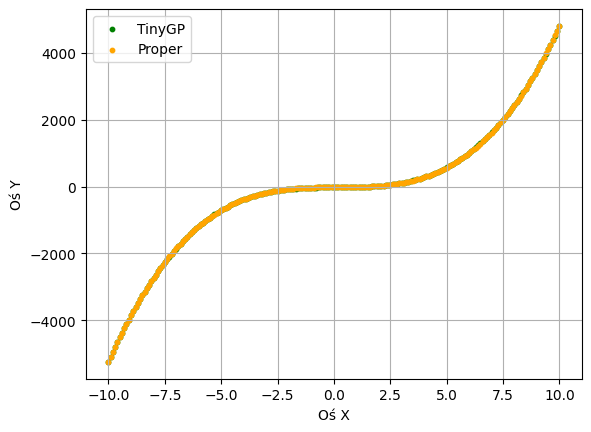

Funkcja:  1
Krok:  0.5
Początek:  0.0  , Koniec:  100.0
5 * X1**3 - 2 * X1**2 + 3 * X1 - 17
(((((X1  * X1 ) / 1.462591630336597) * (((-3.319861936024836 * X1 ) / ((-0.7859561189499971 * (3.174612840097513 + 1.0887025767868632)) / (4.771082431323427 + (-1.7338595902706722 * -1.493866475017386)))) + (-0.5287918795422275 + 3.6434442830987273))) + ((((X1  - (((-2.1448359544185944 - X1 ) / ((-4.369640634660933 / (-2.258586744434199 / ((-2.1448359544185944 + ((-3.3037666141918534 + -4.782879716903792) / (-4.323179927384744 - -4.323179927384744))) - 2.78859062384726))) + (-0.6459456384460189 / 4.353867488596535))) + -4.573931911221481)) * ((((((-4.573931911221481 / ((1.0887025767868632 * (-0.5064746569071596 - (2.78859062384726 / -3.6964276456099165))) + ((2.78859062384726 * X1 ) - 0.18471676330420195))) - -1.1817677745311195) - (-1.865803130446535 * -1.541130185491284)) - 2.7464628463303473) - (2.8391129795014214 * X1 )) - (-3.3037666141918534 * (2.7464628463303473 / -4.323179927384744)))) -

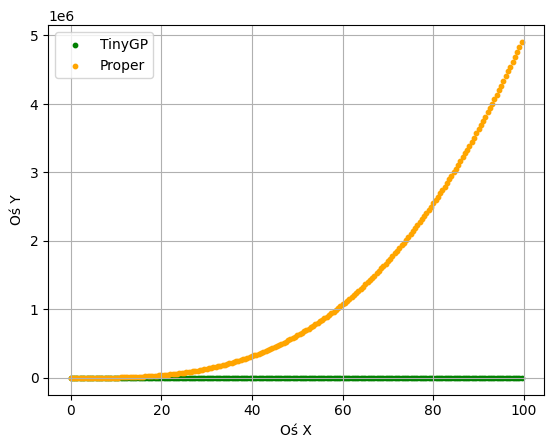

Funkcja:  1
Krok:  0.01
Początek:  -1.0  , Koniec:  1.0
5 * X1**3 - 2 * X1**2 + 3 * X1 - 17
(((-2.584515808237872 + -1.98240800941885) + (2.845352959644176 * -4.397235759085223)) + ((2.164143082834512 - (((-3.7417368675492604 - -1.6267413233997) - (((((((-1.6267413233997 + (((-0.704037017218182 - 1.7090843160745015) + X1 ) * 2.938428252615979)) - ((-1.12067894737937 * -1.1905316192348812) / ((((-1.98240800941885 - (-2.584515808237872 / 1.5172751082071265)) / 3.4337639695024738) * (0.028104876541773294 - 0.5689475371289463)) + (1.524705944658141 - ((X1  * -2.6104162604747607) + (2.845352959644176 * 1.524705944658141)))))) - ((-2.6104162604747607 - (-0.704037017218182 / 0.7495078016328369)) + -0.2321875677228693)) * 0.9173360852239911) - -4.397235759085223) - 1.0323318649433064) / ((((1.406604219824933 - -3.7417368675492604) - -3.285621441140049) + (-0.4921410279506544 - -1.1905316192348812)) + ((-4.2601896432769415 + ((-4.764440346064358 - 0.600825812208968) + (1.524705944658141 / X1 ))

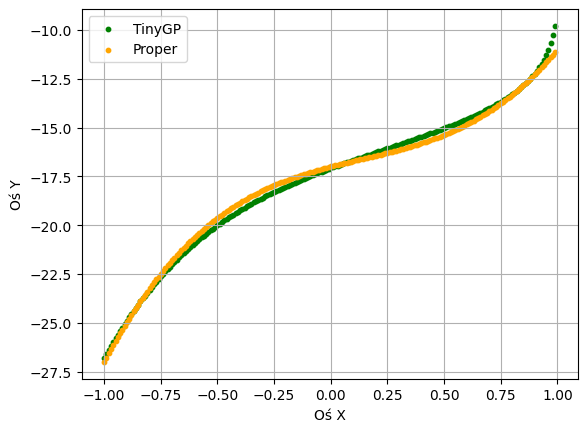

Funkcja:  1
Krok:  10.0
Początek:  -1000.0  , Koniec:  1000.0
5 * X1**3 - 2 * X1**2 + 3 * X1 - 17
(3.194708098207739 + (((((-1.7672284720541862 / 1.5968724755640586) + (((1.508915354717507 - ((-2.1292999864593276 * (X1  * (((X1  / -1.387434029560425) - (-4.4720864387093755 + ((-0.433359162763864 - (((X1  * ((((-3.076296560780852 * (X1  * (0.13507423268798036 - (X1  + (-0.5757450781654327 - (-1.6168797568692406 - (2.7206127125303983 - (-4.182104812952052 * -3.4918282468344994)))))))) - (((3.048824252885261 / (-4.080614140659355 - ((3.4079754194833694 + (0.37820987373706494 / ((-3.860159187862279 - (2.8681343735582185 - (((3.9437543073704475 / -3.4698889121200596) / 2.7206127125303983) + (1.6369266764548929 * (-3.076296560780852 - -0.31785122015904754))))) * (-1.0723031271035843 + (-2.509580353472071 - X1 ))))) - (((-2.3879003951718616 * (-2.1292999864593276 + X1 )) / -3.076296560780852) - (-1.7672284720541862 * X1 ))))) * 3.500265663192401) / -2.5710355917426817)) * (X1  * (-2.317999883

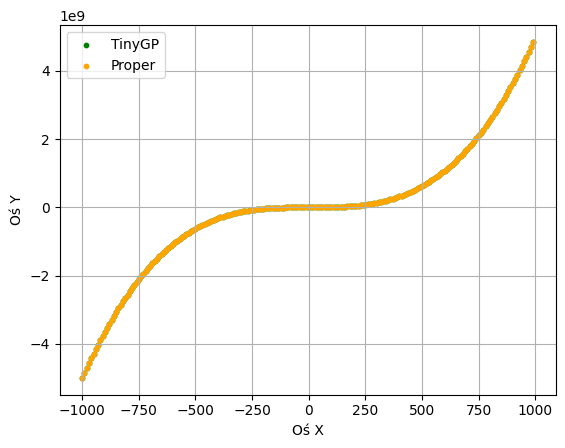

Funkcja:  2
Krok:  0.031400000000000004
Początek:  -3.14  , Koniec:  3.14
math.sin(X1) + math.cos(X1)
((X1  - (-1.7757538732406077 / (2.9925699493733324 - (0.8622053337248747 / 1.348330193524756)))) * (((4.946831715880041 / 2.0351827029709444) - X1 ) / (((-0.32678651978877227 * (0.4787530205150663 / ((2.317869960425698 / (((-1.3420490601099697 * ((X1  - (-1.7757538732406077 / (2.9925699493733324 - (1.9009084305256483 / 1.348330193524756)))) * (((4.946831715880041 / 2.0351827029709444) - X1 ) / (X1  - (-1.4725568158074918 + (-4.375103975485802 * 0.774693368960012)))))) + -2.9600406711529725) * (4.535619359704114 + 0.27942381578853137))) / (-4.88199367970818 - (-0.09936455796110977 / ((-1.2255829146104569 * 0.6164049551801929) * ((((0.34133376338714605 + ((4.622580665430721 + 0.774693368960012) + ((-1.3097374084786226 / (((0.8056495912870334 / -1.3097374084786226) - 4.946831715880041) / (((X1  - ((4.946831715880041 + -2.522366493203476) - (2.943650342451088 - 0.4787530205150663))) + -3.0

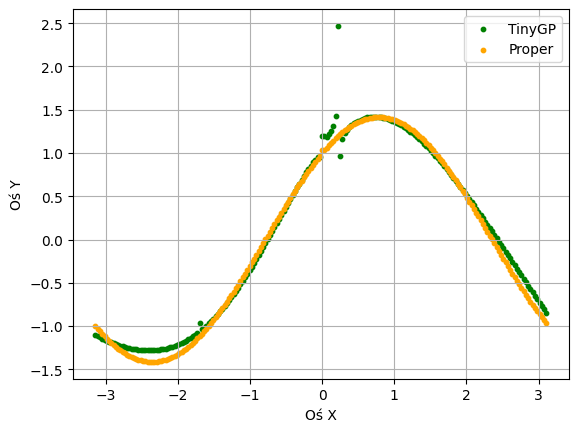

Funkcja:  2
Krok:  0.035
Początek:  0.0  , Koniec:  7.0
math.sin(X1) + math.cos(X1)
(((-0.8777414800510153 - ((-1.0632088436101061 * X1 ) + (-0.35601265850804076 - 1.5849593875185004))) + -3.5475611827549014) / ((X1  * 0.1637824053145831) + ((((0.48358849908556767 / ((3.7846328738775235 * (-1.239047304836535 - 4.253879666391429)) / -3.9062006175576913)) + 4.2519010290163255) + ((((((((-3.616785415327275 + -2.8216792552689887) / -0.8777414800510153) / 4.253879666391429) + (X1  - -1.432038256521336)) - (((1.3786385186112078 + (-3.3163606696830685 * X1 )) / ((((3.743594805483349 * -2.8216792552689887) - ((3.289081631111067 + 4.014860241642669) / (2.2181553849318156 * -0.5691550973431561))) / (-3.3835322870615734 + 3.356308053938861)) + -0.17150866946569288)) * -0.7922754374850509)) * -1.238521458978803) / (((3.7846328738775235 * (4.2519010290163255 / ((3.20798181200246 + -1.0632088436101061) - (X1  - -1.432038256521336)))) - -4.589806154791467) + -1.239047304836535)) / 1.3786385186112078)

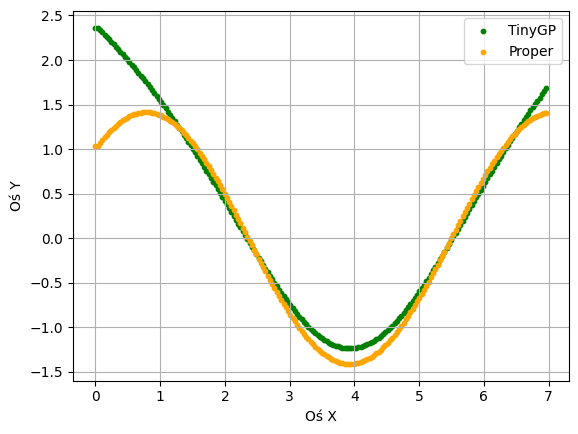

Funkcja:  2
Krok:  0.5
Początek:  0.0  , Koniec:  100.0
math.sin(X1) + math.cos(X1)
(-0.002605973820499763 / (((-0.6846977218023911 + 4.302817617967872) / (3.2844338853935557 / -0.002605973820499763)) / ((1.4679709002065078 - (((-3.693919940086139 / (-4.263483586399217 * -3.0785811077714653)) * -4.236800656522835) * X1 )) - ((((((4.890017382185194 / ((((-3.0785811077714653 / (((-4.909737180296111 * (-0.002605973820499763 / 3.5858774399849977)) + 3.5858774399849977) + (-0.37310163669707386 - -3.0785811077714653))) - -0.8173768551925376) * (-3.348171822118513 - (((4.890017382185194 - (-3.7863745538817795 - (4.890017382185194 / -0.9534310793234511))) / (-0.0125910104504392 / X1 )) - (-1.8398717811731746 / -1.486224185672512)))) + (3.516383792208856 + -3.2925192332405553))) - 3.49795984277025) / (-4.675846466345699 - 3.3096395092220092)) / (2.334242423151612 * (-3.348171822118513 * -2.7383680274752207))) / (-0.002605973820499763 / (((-0.6846977218023911 + 4.302817617967872) / (3.2844338853

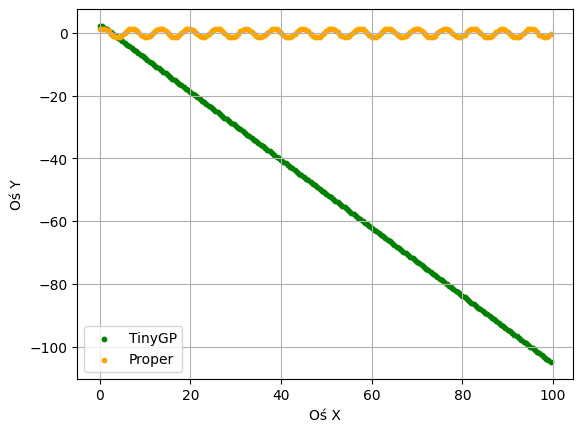

Funkcja:  2
Krok:  1.0
Początek:  -100.0  , Koniec:  100.0
math.sin(X1) + math.cos(X1)
(((-4.671333921970296 - (((0.7178418396822126 / ((((((-3.7218927634700174 / X1 ) / ((((X1  + 4.279815548131809) - -2.062860066713763) * 0.25620659099847565) - (0.5335515625431198 / (((-4.690738549819699 / 3.7775297681770184) / (2.993136525685877 - ((-4.289514792740365 / (-3.044108915480651 / X1 )) * -3.495698618490887))) + -4.671333921970296)))) + -2.8041355957523697) / X1 ) / ((-0.11945853861079136 - (4.404673156377314 * 0.24223463071251228)) + -3.2456099274441828)) * (((0.7112684970689829 / (2.993136525685877 - 3.371202435122033)) * (-4.278201968894314 * ((0.08768872720504106 + (((0.5335515625431198 - ((2.443910558602532 / 1.2094084710095316) * (-1.7037926825457061 / 3.8231729169576614))) / X1 ) / ((((1.8611428032616528 - ((((((((2.443910558602532 / ((-2.6869230057246716 - -3.368422376338666) + 0.34804088143943623)) + -3.044108915480651) / (-1.9167245913093311 / (((((0.24223463071251228 + 2.0363560

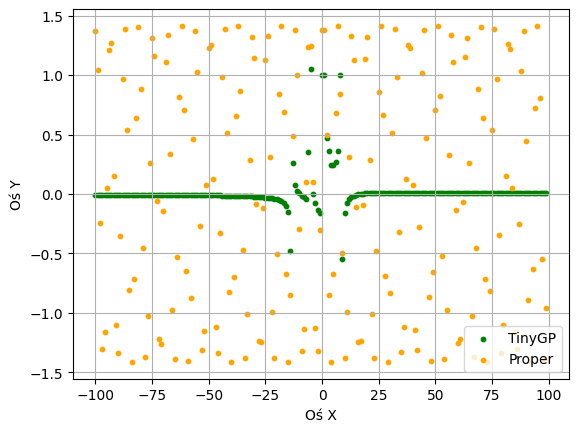

Funkcja:  3
Krok:  0.02
Początek:  0.0  , Koniec:  4.0
2 * math.log(X1 + 1)
(X1  / (((X1  - (-3.4535092089702513 / -3.5088400907027015)) - (-3.0632436207396507 + (((((2.1604257862599976 * (0.13183885336186751 / ((((3.3155004842882914 * (0.5822735918862589 - (X1  / (((1.329940115790187 * (3.241556286502256 / X1 )) - 0.6676154373202259) + (-0.4127500921636882 + (((-0.9783791156730661 * -4.1044121309148265) + (-3.080873080436499 * 1.8818227126562093)) * (4.220082154401791 / -1.8165493561599186))))))) / -2.025474968551114) + 4.314845171667455) / ((((-3.5544552648868857 + 3.241556286502256) + (-0.38159934189799216 + (X1  + ((-4.466810782871198 + (((-1.2663937979592408 - (-3.2634733749432945 + -3.7922975642333254)) / (3.8388646636486516 - 3.310388222834833)) - 4.58867921335173)) / ((-3.2719039969111066 / (-0.3933804455984209 / (4.068100923509121 - -4.526906605381189))) - 3.755568270678449))))) * -4.466810782871198) * (-3.5088400907027015 - -0.3149787381679472))))) + (3.738790969733948 / 1.73

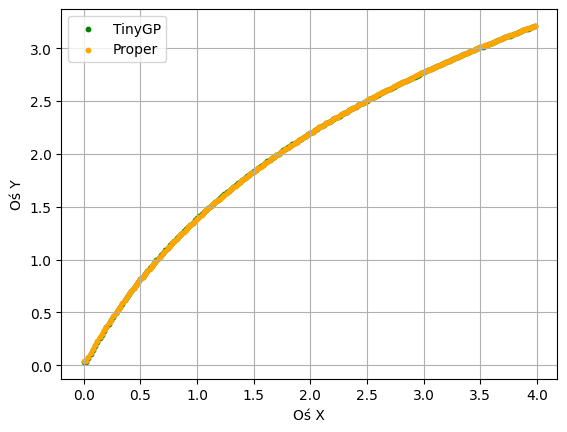

Funkcja:  3
Krok:  0.045
Początek:  0.0  , Koniec:  9.0
2 * math.log(X1 + 1)
(((X1  + -2.5505087653064273) / ((X1  / 4.090095327800126) - ((2.8428495691524 - (X1  / ((4.039617404990109 * ((((X1  / (4.417750155137782 - (((((-1.3005648935304626 / 2.101523484529441) + (((-1.153890511308492 * ((-2.1183093822475128 - -0.006926658117904161) / 4.417750155137782)) / -4.696951963613096) + ((1.843710224685104 + (0.10150900744018809 - 2.6058909324805946)) / (-4.113395610629006 + (1.6729694068593997 + (-4.565053873794213 + -2.9408823504067327)))))) / -1.3213472574599452) + X1 ) * 0.6674436140283904))) - ((2.50948428548024 - (X1  / ((4.039617404990109 * (((1.1485658866677664 - ((4.039617404990109 - (0.2370595533018971 / 4.039617404990109)) - ((((-3.0668810138238567 / 0.6674436140283904) * (-4.521317795415371 - (0.2370595533018971 - ((2.50948428548024 + 4.090095327800126) / (3.7045240870341107 + ((0.6674436140283904 * 1.6808183452821108) / (((0.2370595533018971 * 3.8834476204999593) / ((-1.040891737

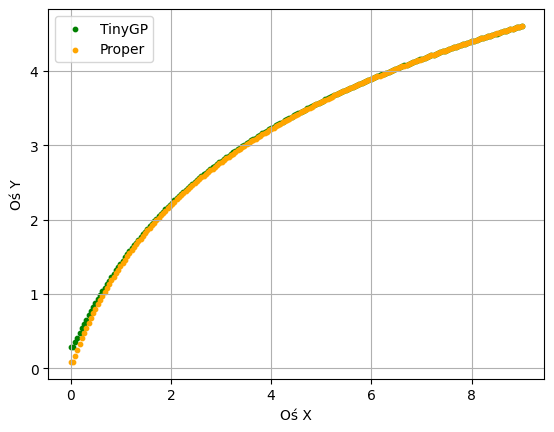

Funkcja:  3
Krok:  0.495
Początek:  0.0  , Koniec:  99.0
2 * math.log(X1 + 1)
(((-0.1889732057919904 + 1.0191939015308211) / (-3.183234324711599 + 1.8559873923187231)) + ((((2.3877163055668618 / (-1.455604970602148 * -3.23881638980236)) / ((-3.183234324711599 / -0.8622212922297159) * (((3.6543127204834285 / X1 ) / -0.9054270296145761) * -2.144079019084635))) + 2.7396865318036703) + (((3.2673958125688998 / ((((3.383152773252185 * (-2.144079019084635 + -2.291974119055127)) * 1.5359239967949145) / ((((-2.0213303610649156 - -0.4428983307258507) / -1.36723488682882) * ((0.1590527162910993 - 1.665776009009484) * (3.08355265204613 + 0.5872527673964196))) + X1 )) - 1.1032272499865297)) - 1.1872265451261423) * (-0.3620313685878864 - 1.1872265451261423))))
Przypadek:  0.0 0.0 0.495


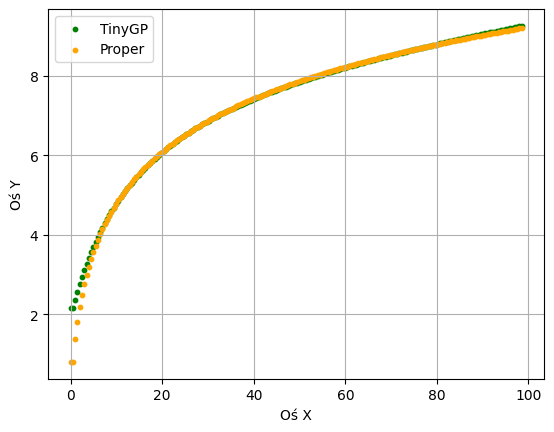

Funkcja:  3
Krok:  4.995
Początek:  0.0  , Koniec:  999.0
2 * math.log(X1 + 1)
((2.5396765454960413 + 3.191905558575872) + (((((3.1443094548007373 + (3.506982264656898 / ((3.506982264656898 / (2.5401128939264677 + -4.04312083523303)) * ((((-3.00946525558449 - (1.3195541416195669 / -0.6313681581798569)) / X1 ) - (1.3195541416195669 / -1.8221982092008582)) / X1 )))) - (0.5094065525619236 / -0.6898653526154055)) / (3.4257882091731258 - (3.3991239950650822 - X1 ))) - 3.1009935505738646) / ((-1.8094165150859376 + ((((3.4257882091731258 * -1.978915475368158) * 1.8028964028724639) + (4.819652390915278 * ((1.6696655188740017 * 4.880448179456167) + 2.5401128939264677))) * ((-3.00946525558449 - (1.3195541416195669 + ((1.6630208145260443 - (4.707001241338297 * ((-1.832713839692989 - (3.693886615145246 - -2.6914611096662213)) / ((2.5396765454960413 + 4.707001241338297) + (-2.6914611096662213 / ((-2.6003760039971957 + (((4.880448179456167 + 2.5401128939264677) + (1.1488533302521535 + (((-1.80941651

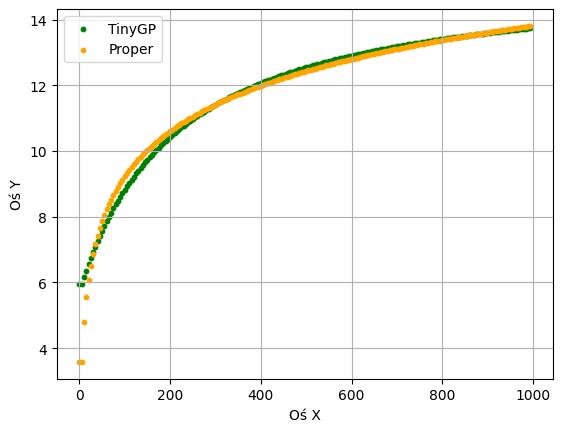

Funkcja:  4
Krok:  0.01


TypeError: can only concatenate str (not "float") to str

In [9]:
folder_glowny = os.getcwd() #sciezka do twojego folderu
pliki_done = znajdz_pliki_done(folder_glowny, "done lab1")